<a href="https://colab.research.google.com/github/GeorgiaAAAl/GeorgiaAAAl/blob/main/Gr%C3%A1ficos_Georgia_idade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/georgia/GEORGIA.xlsx')
display(df)

,Data proc,G1 Protocol,Prontuário,Idade (anos),CATEGORIA,PKA DAP total (Gycm²)
0,2023-07-07,CARDIAC,17170622,0.070000,A,0.3400
1,2019-05-07,THORAX,15788953,0.083333,A,0.0323
2,2021-03-28,THORAX,16336737,0.083333,A,0.0146
3,2020-03-26,ORTHOPAEDICS,16088098,0.087600,A,0.0317
4,2022-07-04,THORAX,16792020,0.098600,A,0.0423
...,...,...,...,...,...,...
827,2018-06-15,THORAX,14302897,17.000000,E,0.5630
828,2020-10-15,THORAX,16147548,18.000000,E,0.0600
829,2020-01-07,VASCULAR HQ,9020157,18.000000,E,19.9000
830,2019-06-11,THORAX,8684706,18.000000,E,3.4800


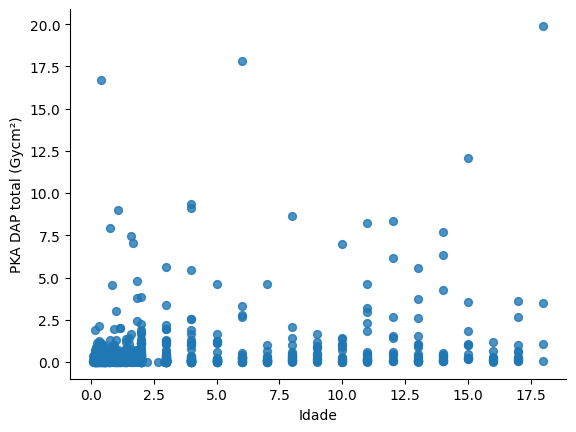

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Idade', y='PKA DAP total (Gycm²)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

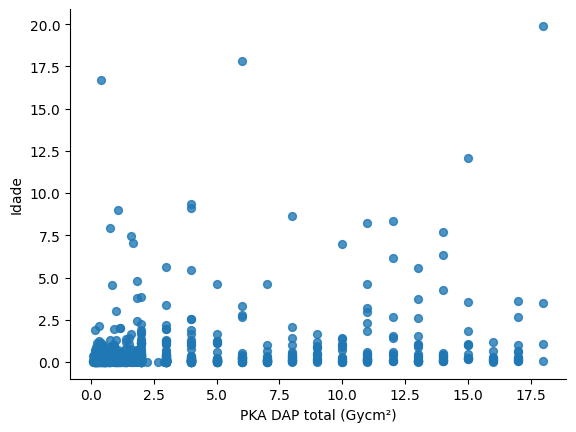

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', y='Idade', x='PKA DAP total (Gycm²)', s=32, alpha=.8)
plt.xlabel('PKA DAP total (Gycm²)')
plt.ylabel('Idade')
plt.gca().spines[['top', 'right',]].set_visible(False)

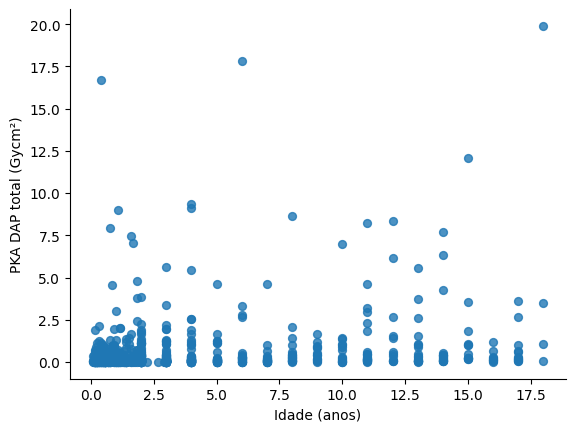

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Idade (anos)', y='PKA DAP total (Gycm²)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
categoria_cont = df['CATEGORIA'].value_counts()
categoria_cont = categoria_cont.reindex(['A', 'B', 'C', 'D', 'E'])
display(categoria_cont)

,count
CATEGORIA,
A,221
B,379
C,107
D,87
E,38


In [ ]:
categoriasestat = df.groupby('CATEGORIA')['PKA DAP total (Gycm²)'].describe()
categorias_dados = categoriasestat[['min', '50%', '75%', 'max','std']]
display(categorias_dados)

,min,50%,75%,max,std
CATEGORIA,,,,,
A,0.001300,0.0669,0.2040,16.70,1.300828
B,0.000219,0.0880,0.3260,9.34,1.172407
C,0.000598,0.1700,0.4690,17.80,2.023097
D,0.004640,0.3120,1.0650,8.37,2.015320
E,0.013100,0.2790,1.0375,19.90,3.700750


In [ ]:
faixa_kg = {
    'A': '< 1',
    'B': '1 < 5',
    'C': '5 < 10',
    'D': '10 < 15',
    'E': '  ≥ 15 '
}

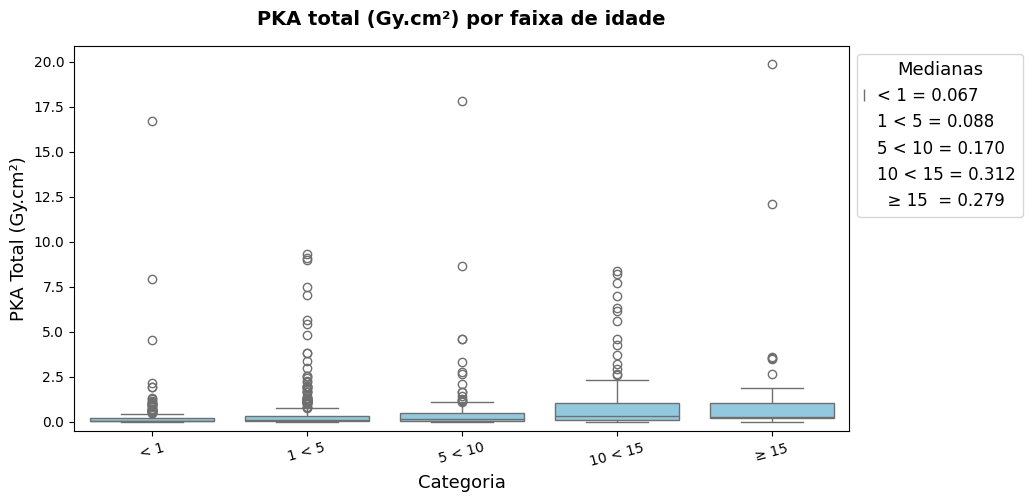

In [ ]:
#com outliers
plt.figure(figsize=(10, 5), facecolor='white')
sns.boxplot(x='CATEGORIA', y='PKA DAP total (Gy.cm^2)', data=df, color='skyblue')
plt.title('PKA total (Gy.cm²) por faixa de idade', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Categoria', fontsize=13)
plt.ylabel('PKA Total (Gy.cm²)', fontsize=13)
plt.ylim(bottom=-0.5)
plt.xticks(rotation=15)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['< 1', '1 < 5', '5 < 10', '10 < 15', ' ≥ 15 ']) # se você não especificou quais são as categorias no texto

medianas = categorias_dados['50%']
legenda_textos = [f'{faixa_kg[categoria]} = {mediana:.3f}' for categoria, mediana in medianas.items()] # se você não especificou quais são as categorias no texto
plt.legend(legenda_textos, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title="Medianas", title_fontsize=13, handlelength=0)

plt.show()

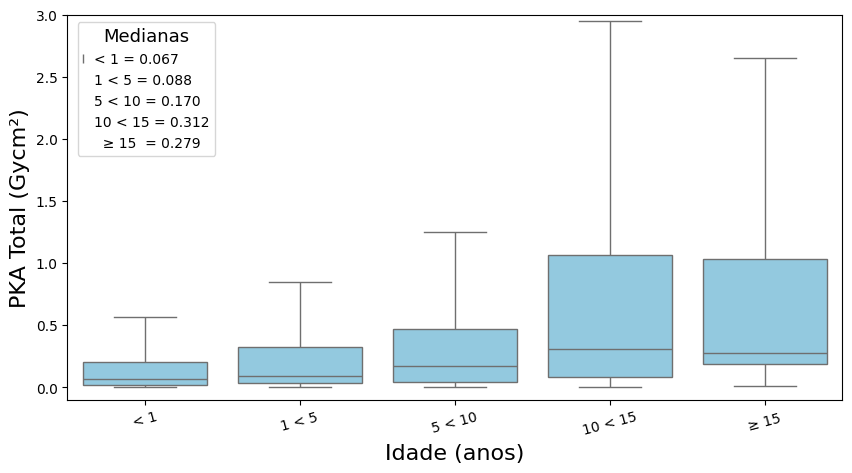

In [ ]:
#sem outliers
plt.figure(figsize=(10, 5), facecolor='white')
#plt.title('PKA total (Gy.cm²) por faixa de idade (anos)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Idade (anos)', fontsize=16)
plt.ylabel('PKA Total (Gycm²)', fontsize=16)
plt.ylim(bottom=-0.5)

#plt.xticks(ticks=[0, 1, 2, 3, 4],
           #labels=['< 1', '1 < 5', '5 < 10', '10 < 15', ' ≥ 15 '],
           #rotation=16,
           #fontsize=16)  # Define o tamanho da fonte dos rótulos
#sns.boxplot(x='CATEGORIA', y='PKA DAP total (Gycm²)', data=df, showfliers=False, whis=2, color='skyblue')
#plt.ylim(-0.1, 3)





plt.xticks(rotation=15)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['< 1', '1 < 5', '5 < 10', '10 < 15', ' ≥ 15 ']) # se você não especificou quais são as categorias no text
# The column name likely had a typo or a slight difference in the DataFrame.
# Changed 'PKA DAP total (Gy.cm^2)' to 'PKA DAP total (Gycm²)' to match the column name from previous code cells.
sns.boxplot(x='CATEGORIA', y='PKA DAP total (Gycm²)', data=df, showfliers=False, whis=2, color='skyblue')
plt.ylim(-0.1,3)
plt.xticks(rotation=15)

medianas = categorias_dados['50%']
legenda_textos = [f'{faixa_kg[categoria]} = {mediana:.3f}' for categoria, mediana in medianas.items()] # se você não especificou quais são as categorias no texto
plt.legend(legenda_textos, loc='upper right', bbox_to_anchor=(0.2, 1), fontsize=10, title="Medianas", title_fontsize=13, handlelength=0)

plt.show()

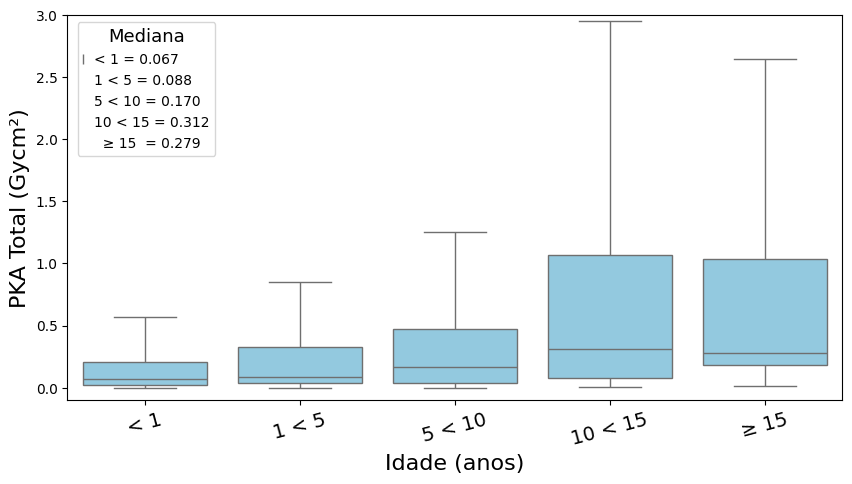

In [ ]:
plt.figure(figsize=(10, 5), facecolor='white')
plt.xlabel('Idade (anos)', fontsize=16)
plt.ylabel('PKA Total (Gycm²)', fontsize=16)
plt.ylim(bottom=-0.5)

# Criando o boxplot
sns.boxplot(x='CATEGORIA', y='PKA DAP total (Gycm²)', data=df, showfliers=False, whis=2, color='skyblue')
plt.ylim(-0.1, 3)

# Alterando os rótulos do eixo x com tamanho de fonte
ax = plt.gca()  # Obtém o eixo atual
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['< 1', '1 < 5', '5 < 10', '10 < 15', '≥ 15'], fontsize=14, rotation=15)

# Aumentando o tamanho da fonte dos valores do eixo y
#ax.tick_params(axis='y', labelsize=14)  # Ajusta o tamanho da fonte dos valores no eixo y

# Adicionando legendas
medianas = categorias_dados['50%']
legenda_textos = [f'{faixa_kg[categoria]} = {mediana:.3f}' for categoria, mediana in medianas.items()]
plt.legend(legenda_textos, loc='upper right', bbox_to_anchor=(0.2, 1), fontsize=10, title="Mediana", title_fontsize=13, handlelength=0)